In [ ]:
"""
   - ------   BINANCE WEBSOCKET ERROR  -------
      -----------  TEST LIVE DATA and DATA BASE --------
              ( - ICI CA MARCHE - )
YT :::
Algovibes
39,3 k abonnés

FIX ERROR BINANCE WEBSOCKET ...

How to get LIVE cryptocurrency data with Python using the 
Binance API / 
ERROR FIXING
https://www.youtube.com/watch?v=OX5eDJDtqhc
https://www.youtube.com/watch?v=OX5eDJDtqhc

YT  :::
INFINITY ALEX  ( - ICI CA MARCHE - )
https://www.youtube.com/watch?v=ml3jGc8RqMk
https://www.youtube.com/watch?v=ml3jGc8RqMk

"""

In [1]:
pip install python-binance

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import sqlalchemy
from binance import Client

In [4]:
import pandas as pd
#import python_ta as ta
import numpy as np

In [5]:
# LE SCREENER  2 ........................................................
api_key ='GwvK4xNzrBr1HpEozMWx2AnWevMRlUZxPgroPvDcy2l4tqdzBH1eBa6PSpriyQTb'
api_secret = 'DGij2y3b9teZHM0vrqafkGzuKbtKCM4wtI3RpA96DqPFNo433HCUJhs4cnSI3MQq'
client = Client(api_key,api_secret)
#client = Client()
client.get_account()  # <<< Pour avoir le solde du compte BINANACE   ...

{'makerCommission': 10,
 'takerCommission': 10,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'canTrade': True,
 'canWithdraw': True,
 'canDeposit': True,
 'updateTime': 1654042317199,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BTC', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'NEO', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'BNB', 'free': '0.08731431', 'locked': '0.00000000'},
  {'asset': 'QTUM', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'EOS', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'SNT', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'BNT', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'GAS', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'BCC', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '47.75433589', 'locked

In [247]:
symbol ='BTCUSDT'

In [5]:
engine = sqlalchemy.create_engine('sqlite:///'+ symbol + 'stream.db')

<AxesSubplot:>

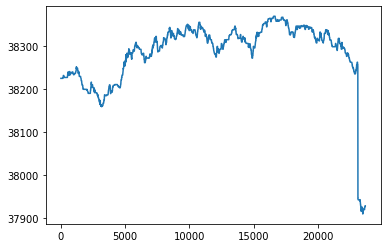

In [6]:
df=pd.read_sql('BTCUSDT', engine)
df.Price.plot()
#Fdf.plot()

In [7]:
def strategy(entry, loockback, qty, open_position=False):
  while True:
    # time.sleep(0.5)
    df=pd.read_sql('BTCUSDT', engine)
    lookbackperiod = df.iloc [-loockback:]
    cumret = (lookbackperiod.Price.pct_change() +1).cumprod() - 1

    df['sma9'] = df['Price'].rolling(9).mean() # <<<--- SMA 9 --------.
    df['sma21'] = df['Price'].rolling(21).mean() # <<<--- SMA 21 --------..
    backrollingN = 10  #  <<<  ---  for SLOPES  ----
    df['slope21'] = df['sma21'].diff(periods=1) # <<<--- SLOPES ------.
    df['slope21'] = df['slope21'].rolling(window=backrollingN).mean()

    
    if not open_position :
      if (cumret [cumret.last_valid_index()] > entry and
          df.Price.iloc[-1] > df.sma21.iloc[-1] and
          df.slope21.iloc[-1] > 0):
          order = client.create_order(symbol='BTCUSDT' ,
                                    side='BUY',
                                    type='MARKET',
                                    quantity=qty)
          print(order)
          print('BUY :::')
          print('BuyPrice : ', df.Price.iloc[-1] )
          open_position = True
          break
  if open_position:
      while True:
        df = pd.read_sql('BTCUSDT', engine)
        sincebuy = df.loc[df.time >
                          pd.to_datetime(order['transactTime'], 
                          unit='ms')]
        if len(sincebuy) > 1:
          sincebuyret = (sincebuy.Price.pct_change() +1).cumprod() - 1
          last_entry = sincebuyret[sincebuyret.last_valid_index()]
          if last_entry > 0.0010 or last_entry < -0.0010:
            order = client.create_order(symbol='BTCUSDT',
                                         side='SELL',
                                         type='MARKET',
                                         quantity=qty)
            print(order)
            print('SELL :::')
            print('SellPrice : ', df.Price.iloc[-1] )

            # Test Price succes et mettre resultat dans summary ...

            open_position = False
            break

In [18]:
# LE SCREENER  2 ........................................................
# Function to get minute by minute...
def getminutedata(symbol, interval, lookback):
    frame = pd.DataFrame(client.get_historical_klines(symbol, interval, lookback + ' min ago UTC'))  
        
    frame = frame.iloc[:,:6]  # Select First six colonnes .....
    frame.columns =['Time', 'Open', 'High', 'Low', 'Close', 'Volume'] # rename colonnes
    frame = frame.set_index('Time')  # Set time to index  ...
    frame.index = pd.to_datetime(frame.index, unit='ms') # reformat index ...
    frame = frame.astype(float)  # transform string to float
    return frame

In [32]:
def strategyENGULFING(symbol, open_position=False):   # <<<-------  10 JUIN 2022  -------
# def strategyENGULFING(symbol, qty, open_position=False):  
 #     ---------------   DEBUT  10 JUIN 2022   DEBUT  -------------------------
    print('Look  at ::: ', symbol)
    invest = 40  #  Dollars ....
    info = client.get_symbol_info(symbol=symbol)
    lotsize = float([i for i in info['filters'] if i['filterType']=='LOT_SIZE'][0]['minQty'])
    prize = float(client.get_symbol_ticker(symbol=symbol)['price'])
    #buy_qty = round(invest/prize, len(str(lotsize).split('.')[1]) )
    buy_qty = round(invest/prize, len(str(lotsize).split('.')[0]) )
    buy_qty = round(invest/prize, 3 )    
    #     ---------------   FIN  10 JUIN 2022   FIN  -------------------------
#.def strategyENGULFING(entry, loockback, qty, open_position=False):
  #.while True:
    # time.sleep(0.5)
    # df=pd.read_sql('BTCUSDT', engine)
    df = getminutedata(symbol, '1m', '30') # <<-- 30 dernieres minutes .
    #.df = getminutedata(x['symbol'], '1m', '730') # <<-- 730 minutes pour 12 heures..
    
    #..lookbackperiod = df.iloc [-loockback:]
    #..cumret = (lookbackperiod.Open.pct_change() +1).cumprod() - 1

    df['sma9'] = df['Close'].rolling(9).mean() # <<<--- SMA 9 --------.
    df['sma21'] = df['Close'].rolling(21).mean() # <<<--- SMA 21 --------..
    backrollingN = 10  #  <<<  ---  for SLOPES  ----
    df['slope21'] = df['sma21'].diff(periods=1) # <<<--- SLOPES ------.
    df['slope21'] = df['slope21'].rolling(window=backrollingN).mean()

    #bodydiff[row] = abs(df.Open.iloc[-1]-df.Close.iloc[-1])
    bodydiff = abs(df.Open.iloc[-1]-df.Close.iloc[-1])
    bodydiffprec = abs(df.Open.iloc[-2]-df.Close.iloc[-2])
    bodydiffmin = 0.003
    if not open_position :  # <<-- in_position ...
      #if (cumret [cumret.last_valid_index()] > entry and
      #    df.Price.iloc[-1] > df.sma21.iloc[-1] and
      #    df.slope21.iloc[-1] > 0):
      if (bodydiff > bodydiffmin and bodydiffprec > bodydiffmin and
          df.Open.iloc[-2] > df.Close.iloc[-2] and
          df.Open.iloc[-1] < df.Close.iloc[-1] and

          df.Close.iloc[-1] > df.sma21.iloc[-1] and # <<< ---- check SMA 21 ...
          df.Close.iloc[-1] > df.sma9.iloc[-1] and # <<< ---- check SMA 9 ...  
          df.sma9.iloc[-1] >= df.sma21.iloc[-1] and # <<< ---- check SMA 9 > SMA21 ... 

          # df.sma9.iloc[-2] < df.sma21.iloc[-2] and
           #open[row]<=close[row-1] and close[row]>open[row-1]):
          (df.Open.iloc[-1]-df.Close.iloc[-2])<=-0e-5 and df.Close.iloc[-1]>df.Open.iloc[-2] 
          ):          
          # order = client.create_order(symbol='BTCUSDT' ,
          order = client.create_order(symbol=symbol ,
                                    side='BUY',
                                    type='MARKET',
                                    quantity=buy_qty)
          print(order)
          index3 +=1  #  <<< ----   INDEX 3  ......
          print('BUY :::')
          BuyPrice = df.Close.iloc[-1]
          print('BuyPrice : ', df.Close.iloc[-1] )
          open_position = True
      else:
          print('No ', symbol ,' ENGULFING Trade has been found executed')    
          #.break
    if open_position:     # <<-- in_position ...
        while True:
          #.df = pd.read_sql('BTCUSDT', engine)
          df = getminutedata(symbol, '1m', '30') # <<-- 30 dernieres minutes ...
          sincebuy = df.loc[df.index >
                            pd.to_datetime(order['transactTime'], 
                            unit='ms')]
          if len(sincebuy) > 0:
            sincebuyret = (sincebuy.Open.pct_change() +1).cumprod() - 1
            #. last_entry = sincebuyret[sincebuyret.last_valid_index()]
            #. if last_entry > 0.0010 or last_entry < -0.0010:
            #.if sincebuyret[-1] > 0.0017 or sincebuyret[-1] < -0.0007:
            if sincebuyret[-1] > 0.0011 or sincebuyret[-1] < -0.0007:    
              # order = client.create_order(symbol='BTCUSDT',
              order = client.create_order(symbol=symbol,
                                           side='SELL',
                                           type='MARKET',
                                           quantity=buy_qty)
              print(order)
              print('SELL :::')
              SellPrice = df.Close.iloc[-1]
              print('SellPrice : ', df.Close.iloc[-1] )

              # Test Price succes et mettre resultat dans summary ...
              new_row = {'Symbol': symbol,
                            'index3': index3,
                              'Qty': buy_qty,
                        'BuyPrice': BuyPrice,
                        'Diff9-21': (SellPrice-BuyPrice),
                        'SellPrice': SellPrice
                        }

              #new_row = {'Symbol': symbol,
              #              'index3': index3,
              #                'Qty': buy_qty,
              #          'BuyPrice': BuyPrice,
              #          'Buytime': Buytime,
              #          'Diff9-21': diff9_21,
              #          'SellPrice': SellPrice,
              #          'Selltime': Selltime
              #          }
              summary_2 = summary_2.append(new_row, ignore_index = True)

              open_position = False
              break

            #           FIN ---- ENGULFING   ---   FIN 
            #           FIN ---- ENGULFING   ---   FIN 
            #           FIN ---- ENGULFING   ---   FIN 
            #           FIN ---- ENGULFING   ---   FIN 

In [ ]:
strategy(0.001, 300, 0.001)

In [ ]:
import time
open_position = False
while True:
    # time.sleep(60) # <<< --- 60 pour 1 minute ...
    if not open_position:
        strategy(0.001, 300, 0.001)

In [10]:
import time
open_position = False
while True:
    time.sleep(10) # <<< --- 60 pour 1 minute ...
    print('Test   Temp dattente  xx .......')
    # if not open_position:
    #     strategy(0.001, 300, 0.001)
    #     strategyENGULF(0.001, 300, 0.001)

Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......
Test   Temp dattente  xx .......


KeyboardInterrupt: 

In [23]:
symbol ='BTCUSDT'
open_position = False
strategyENGULFING(symbol, 0.001)

No ENGULFING Trade has been found executed


In [220]:
# Buy quantity ....
symbol ='ENSUSDT'
invest = 40  #  Dollars ....
def buy_quantity(symbol, invest):

    info = client.get_symbol_info(symbol=symbol)
    lotsize = float([i for i in info['filters'] if i['filterType']=='LOT_SIZE'][0]['minQty'])
    print(lotsize)
    #test = str(lotsize).split('.')[1]
    #print(test)
    prize = float(client.get_symbol_ticker(symbol=symbol)['price'])
    long = len(str(lotsize).split('.')[0] )
    buy_qty = round(invest/prize, long )
    
    return buy_qty

In [221]:
buy_qty = buy_quantity(symbol, invest)
buy_qty

0.01


1.9

In [109]:

#buy_qty = round(invest/prize, len(str(lotsize).split('.')[1]) )
buy_qty = round(invest/prize, 3 )

In [111]:
buy_qty

0.194

In [222]:
import time

symbol ='BTCUSDT'
open_position = False
print('Test   Temps dattente  xx .......')
while True:
    # time.sleep(60) # <<< --- 60 pour 1 minute ...
    if not open_position:
        # Buy quantity ....
        symbol ='BTCUSDT'
        invest = 40  #  Dollars ....
        #buy_qty = round(invest/prize, len(str(lotsize).split('.')[1]) )
        #buy_qty = round(invest/prize, 3 )
        buy_qty = buy_quantity(symbol, invest)
        #strategy(0.001, 300, 0.001)
        #strategyENGULF(0.001, 300, 0.001)
        strategyENGULFING(symbol, buy_qty)    
   

    print('Test   Temps dattente  xx .......')
    time.sleep(60) # <<< --- 60 pour 1 minute ...
    
                                              

Test   Temps dattente  xx .......
1e-05
No  BTCUSDT  ENGULFING Trade has been found executed
Test   Temps dattente  xx .......


KeyboardInterrupt: 

In [250]:
import time

symbol ='BTCUSDT'
open_position = False
print('Test   Temps dattente  xx .......')
while True:
    # time.sleep(60) # <<< --- 60 pour 1 minute ...
    if not open_position:
        # Buy quantity ....
        symbol ='ETHUSDT'
        print('Look  at ::: ', symbol)
        invest = 40  #  Dollars ....
        info = client.get_symbol_info(symbol=symbol)
        lotsize = float([i for i in info['filters'] if i['filterType']=='LOT_SIZE'][0]['minQty'])
        prize = float(client.get_symbol_ticker(symbol=symbol)['price'])
        #buy_qty = round(invest/prize, len(str(lotsize).split('.')[1]) )
        buy_qty = round(invest/prize, len(str(lotsize).split('.')[0]) )
        buy_qty = round(invest/prize, 3 )
        #strategy(0.001, 300, 0.001)
        #strategyENGULF(0.001, 300, 0.001)
        strategyENGULFING(symbol, buy_qty)    
 
    if not open_position:
        # Buy quantity ....
        symbol ='XMRUSDT'
        print('Look  at ::: ', symbol)        
        invest = 40  #  Dollars ....
        info = client.get_symbol_info(symbol=symbol)
        lotsize = float([i for i in info['filters'] if i['filterType']=='LOT_SIZE'][0]['minQty'])
        prize = float(client.get_symbol_ticker(symbol=symbol)['price'])
        buy_qty = round(invest/prize, len(str(lotsize).split('.')[0]) )
        #buy_qty = round(invest/prize, 3 )
        #strategy(0.001, 300, 0.001)
        #strategyENGULF(0.001, 300, 0.001)
        strategyENGULFING(symbol, buy_qty)

    #if not open_position:
    #    # Buy quantity ....
    #    symbol ='ZENUSDT'
    #    print('Look  at ::: ', symbol)        
    #    invest = 40  #  Dollars ....
    #    info = client.get_symbol_info(symbol=symbol)
    #    lotsize = float([i for i in info['filters'] if i['filterType']=='LOT_SIZE'][0]['minQty'])
    #    #prize = float(client.get_symbol_ticker(symbol=symbol)['price'])
    #    buy_qty = round(invest/prize, len(str(lotsize).split('.')[0]) )
    #    #buy_qty = round(invest/prize, 3 )
    #    #strategy(0.001, 300, 0.001)
    #    #strategyENGULF(0.001, 300, 0.001)
    #    strategyENGULFING(symbol, buy_qty)

    if not open_position:
        # Buy quantity ....
        symbol ='ARUSDT'
        print('Look  at ::: ', symbol)        
        invest = 40  #  Dollars ....
        info = client.get_symbol_info(symbol=symbol)
        lotsize = float([i for i in info['filters'] if i['filterType']=='LOT_SIZE'][0]['minQty'])
        prize = float(client.get_symbol_ticker(symbol=symbol)['price'])
        buy_qty = round(invest/prize, len(str(lotsize).split('.')[0]) )
        #buy_qty = round(invest/prize, 3 )
        #strategy(0.001, 300, 0.001)
        #strategyENGULF(0.001, 300, 0.001)
        strategyENGULFING(symbol, buy_qty)

    if not open_position:
        # Buy quantity ....
        symbol ='RUNEUSDT'
        print('Look  at ::: ', symbol)        
        invest = 40  #  Dollars ....
        info = client.get_symbol_info(symbol=symbol)
        lotsize = float([i for i in info['filters'] if i['filterType']=='LOT_SIZE'][0]['minQty'])
        prize = float(client.get_symbol_ticker(symbol=symbol)['price'])
        buy_qty = round(invest/prize, len(str(lotsize).split('.')[0]) )
        #buy_qty = round(invest/prize, 3 )
        #strategy(0.001, 300, 0.001)
        #strategyENGULF(0.001, 300, 0.001)
        strategyENGULFING(symbol, buy_qty)

    if not open_position:
        # Buy quantity ....
        symbol ='HNTUSDT'
        print('Look  at ::: ', symbol)        
        invest = 40  #  Dollars ....
        info = client.get_symbol_info(symbol=symbol)
        lotsize = float([i for i in info['filters'] if i['filterType']=='LOT_SIZE'][0]['minQty'])
        prize = float(client.get_symbol_ticker(symbol=symbol)['price'])
        buy_qty = round(invest/prize, len(str(lotsize).split('.')[0]) )
        #buy_qty = round(invest/prize, 3 )
        #strategy(0.001, 300, 0.001)
        #strategyENGULF(0.001, 300, 0.001)
        strategyENGULFING(symbol, buy_qty)

    if not open_position:
        # Buy quantity ....
        symbol ='SOLUSDT'
        print('Look  at ::: ', symbol)        
        invest = 40  #  Dollars ....
        info = client.get_symbol_info(symbol=symbol)
        lotsize = float([i for i in info['filters'] if i['filterType']=='LOT_SIZE'][0]['minQty'])
        prize = float(client.get_symbol_ticker(symbol=symbol)['price'])
        buy_qty = round(invest/prize, len(str(lotsize).split('.')[0]) )
        #buy_qty = round(invest/prize, 3 )
        #strategy(0.001, 300, 0.001)
        #strategyENGULF(0.001, 300, 0.001)
        strategyENGULFING(symbol, buy_qty)

    if not open_position:
        # Buy quantity ....
        symbol ='LUNAUSDT'
        print('Look  at ::: ', symbol)        
        invest = 40  #  Dollars ....
        info = client.get_symbol_info(symbol=symbol)
        lotsize = float([i for i in info['filters'] if i['filterType']=='LOT_SIZE'][0]['minQty'])
        prize = float(client.get_symbol_ticker(symbol=symbol)['price'])
        buy_qty = round(invest/prize, len(str(lotsize).split('.')[0]) )
        #buy_qty = round(invest/prize, 3 )
        #strategy(0.001, 300, 0.001)
        #strategyENGULF(0.001, 300, 0.001)
        strategyENGULFING(symbol, buy_qty)

    if not open_position:
        # Buy quantity ....
        symbol ='ENSUSDT'
        print('Look  at ::: ', symbol)        
        invest = 40  #  Dollars ....
        info = client.get_symbol_info(symbol=symbol)
        lotsize = float([i for i in info['filters'] if i['filterType']=='LOT_SIZE'][0]['minQty'])
        prize = float(client.get_symbol_ticker(symbol=symbol)['price'])
        buy_qty = round(invest/prize, len(str(lotsize).split('.')[0]) )
        #buy_qty = round(invest/prize, 3 )
        #strategy(0.001, 300, 0.001)
        #strategyENGULF(0.001, 300, 0.001)
        strategyENGULFING(symbol, buy_qty)   

    #if not open_position:
    #    # Buy quantity ....
    #    symbol ='ATOMUSDT'
    #    print('Look  at ::: ', symbol)        
    #    invest = 40  #  Dollars ....
    #    info = client.get_symbol_info(symbol=symbol)
    #    lotsize = float([i for i in info['filters'] if i['filterType']=='LOT_SIZE'][0]['minQty'])
    #    prize = float(client.get_symbol_ticker(symbol=symbol)['price'])
    #    buy_qty = round(invest/prize, len(str(lotsize).split('.')[0]) )
    #    #buy_qty = round(invest/prize, 3 )
    #    #strategy(0.001, 300, 0.001)
    #    #strategyENGULF(0.001, 300, 0.001)
    #    strategyENGULFING(symbol, buy_qty)        

    print('Test   Temps dattente  xx .......')
    time.sleep(50) # <<< --- 60 pour 1 minute ...
    
                                              

Test   Temps dattente  xx .......
Look  at :::  ETHUSDT
No  ETHUSDT  ENGULFING Trade has been found executed
Look  at :::  XMRUSDT
No  XMRUSDT  ENGULFING Trade has been found executed
Look  at :::  ARUSDT
No  ARUSDT  ENGULFING Trade has been found executed
Look  at :::  RUNEUSDT
No  RUNEUSDT  ENGULFING Trade has been found executed
Look  at :::  HNTUSDT
No  HNTUSDT  ENGULFING Trade has been found executed
Look  at :::  SOLUSDT
{'symbol': 'SOLUSDT', 'orderId': 2733844025, 'orderListId': -1, 'clientOrderId': 'efqWiHhFLRDbVY39j9IOZT', 'transactTime': 1653104484498, 'price': '0.00000000', 'origQty': '0.80000000', 'executedQty': '0.80000000', 'cummulativeQuoteQty': '39.59200000', 'status': 'FILLED', 'timeInForce': 'GTC', 'type': 'MARKET', 'side': 'BUY', 'fills': [{'price': '49.49000000', 'qty': '0.25000000', 'commission': '0.00003082', 'commissionAsset': 'BNB', 'tradeId': 273889785}, {'price': '49.49000000', 'qty': '0.55000000', 'commission': '0.00006781', 'commissionAsset': 'BNB', 'tradeId

ValueError: Length mismatch: Expected axis has 0 elements, new values have 6 elements

In [15]:
"""
---------------------------  NEW SCREENER  ---------------------
---------------  ENGULFING     ENGULFING     ENGULFING     ENGULFING  ------------
--------------------    BINANCE 1 MINUTE  ---------------
JEUDI 07 AVRIL 2022
"""
# !pip install python-binance
from binance import Client
import pandas as pd
#import python_ta as ta
import numpy as np

client=Client()
tickersBinance = client.get_all_tickers() # << Get ALL TICKERS ....

# LE SCREENER  2 ........................................................
# Function to get minute by minute...
#def getminutedata(symbol, interval, lookback):
#    frame = pd.DataFrame(client.get_historical_klines(symbol, interval, lookback + ' min ago UTC'))  
#        
#    frame = frame.iloc[:,:6]  # Select First six colonnes .....
#    frame.columns =['Time', 'Open', 'High', 'Low', 'Close', 'Volume'] # rename colonnes
#    frame = frame.set_index('Time')  # Set time to index  ...
#    frame.index = pd.to_datetime(frame.index, unit='ms') # reformat index ...
#    frame = frame.astype(float)  # transform string to float
#    return frame
#  ENGULFING  signals
import random
def Revsignal1(df1):
    length = len(df1)
    high = list(df1['High'])
    low = list(df1['Low'])
    close = list(df1['Close'])
    open = list(df1['Open'])
    sma21 = list(df1['21-day']) # <<< ---- check SMA 21 ... 
    sma9 = list(df1['9-day']) # <<< ---- check SMA 9 ...        
    signal = [0] * length
    bodydiff = [0] * length

    for row in range(1, length):
        bodydiff[row] = abs(open[row]-close[row])
        bodydiffmin = 0.003
        if (bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
            open[row-1]<close[row-1] and
            open[row]>close[row] and 

            #open[row]>=close[row-1] and close[row]<open[row-1]):
            (open[row]-close[row-1])>=+0e-5 and close[row]<open[row-1]):
            signal[row] = 1
        elif (bodydiff[row]>bodydiffmin and bodydiff[row-1]>bodydiffmin and
            open[row-1]>close[row-1] and
            open[row]<close[row] and

            close[row]>sma21[row] and # <<< ---- check SMA 21 ...
            close[row]>sma9[row] and # <<< ---- check SMA 9 ...  
            sma9[row]>sma21[row] and # <<< ---- check SMA 9 > SMA21 ...

            sma9[row-1] < sma21[row-1] and                        

            #open[row]<=close[row-1] and close[row]>open[row-1]):
            (open[row]-close[row-1])<=-0e-5 and close[row]>open[row-1]):
            signal[row] = 2
        else:
            signal[row] = 0
        #signal[row]=random.choice([0, 1, 2])
        #signal[row]=1
    return signal
#  ENGULFING  Target
def mytarget(df1, barsfront):
    length = len(df1)
    high = list(df1['High'])
    low = list(df1['Low'])
    close = list(df1['Close'])
    open = list(df1['Open'])
    trendcat = [None] * length

    piplim = 700e-5
  #  piplim = 500e-5      
  #  piplim = 300e-5
  # piplim = 100e-5    
    for line in range (0, length-1-barsfront):
        for i in range(1,barsfront+1):
            if ((high[line+i]-max(close[line],open[line]))>piplim) and ((min(close[line],open[line])-low[line+i])>piplim):
                trendcat[line] = 3 # no trend
            elif (min(close[line],open[line])-low[line+i])>piplim:
                trendcat[line] = 1 #-1 downtrend
                break
            elif (high[line+i]-max(close[line],open[line]))>piplim:
                trendcat[line] = 2 # uptrend
                break
            else:
                trendcat[line] = 0 # no clear trend  
    return trendcat

#df['Trend'] = mytarget(df,3)
#df.head(30)

def TOP_ENGULFING(): # <<-- For New TOP Engulfing LIST..
    # LE SCREENER  2 .(SUITE) ................................................
    """
    CODE from  :  SP500_SCREENER_POLISH.ipynb  ( - POLISH - )
    05 Mars 2022
    YT ::: 
    Python enthusiast       <<<< ---  ---      ( - POLISH -)
    3,05 k abonnés
    https://www.youtube.com/watch?v=sXqvhmqzXqc
    GitHub CODE: 
    https://github.com/kosta93/Fundamenta...
    """

    # balance_sheet = []
    # income_statement = []
    # cfs = []
    # years = []
    # profitability_score = 0
    # leverage_score = 0
    # operating_efficiency_score = 0
    # pe_ratio = 0
    """
    summary = pd.DataFrame(columns = ['Ticker', 'PE ratio',
                                  'Profitability', 'Leverage',
                                  'Operating eficiency'])
    """
    summary = pd.DataFrame(columns = ['Symbol', 'index',
                                  'Qty', 'Rendement'])

    index =0
    # for ticker in tickers[5000:6010]:
    #for ticker in tickers[349:350]:
    #for ticker in tickers[99:100]:  
    #for ticker in tickers: 
    #for x in tickersBinance[0:500]:
    #for x in tickersBinance:
    #.for x in tickersBinance[416:418]:  # BTC/USDC  et BNB/USDC
    for x in tickersBinance:      
        try:
            # get_data(ticker)
            #..username = input("Enter username:")
            #..print("Username is: " + username)
            #get_data_2(ticker)
            #get_data_2_NEW(ticker)

            #...................LE SCREENER  2 .............................
            #..............................................................
            #df = getminutedata(x['symbol'], '1m', '15')
            #df = getminutedata(x['symbol'], '1m', '30') 
            #df = gethourdata(x['symbol'], '1h', '30') 
    #.  df = getdaydata(x['symbol'], '1d', '365')
    #.  df = gethourdata(x['symbol'], '1h', '730')  
            df = getminutedata(x['symbol'], '1m', '730') # <<-- 730 pour 12 heures..
        #   df = getminutedata(x['symbol'], '1m', '1460') # <<-- 1460 pour 24 heures..        
    #      df = getminutedata(x['symbol'], '1m', '43200') # <<-- 43200 pour 1 moi..                                     
            symbol = x['symbol']
            #.applytechnicals(df)

            #Check if NA values are in data from ENGULFING ...
            df.isna().sum()    

            df['9-day'] = df['Close'].rolling(9).mean() # <<<--- SMA 9 --------.
            df['21-day'] = df['Close'].rolling(18).mean() # <<<--- SMA 21 --------..
            backrollingN = 10  #  <<<  ---  for SLOPES  ----
            df['slope21-day'] = df['21-day'].diff(periods=1) # <<<--- SLOPES ------.
            df['slope21-day'] = df['slope21-day'].rolling(window=backrollingN).mean()

            df['signal1'] = Revsignal1(df)   # <<<--- ENGULFING  signals
            df['Trend'] = mytarget(df,5)    #  <<<--- ENGULFING  Target
            # Detect FALSE Positives for ENGULFING...
            # Detect FALSE Positives for ENGULFING...
            # Detect FALSE Positives for ENGULFING...
            conditions = [(df['Trend'] == 1) & (df['signal1'] == 1),(df['Trend'] == 2) & (df['signal1'] == 2)]
            values = [1, 2]
            df['result'] = np.select(conditions, values)

            trendId=2
            rendement = df[df['result']==trendId].result.count()/df[df['signal1']==trendId].signal1.count()
            print(f'Check {index} for {symbol}:::',df[df['result']==trendId].result.count()/df[df['signal1']==trendId].signal1.count())
            df[ (df['Trend']!=trendId) & (df['signal1']==trendId) ] # << False Positives ...
            # FIN  Detect FALSE Positives for ENGULFING... FIN 
            # FIN  Detect FALSE Positives for ENGULFING... FIN 
        

            df[df['signal1']==2].count()       #<< COMPTER for and from ENGULFING
            qty = df[df['signal1']==trendId].signal1.count()       #<< COMPTER for and from ENGULFING

            print(f'Check {index} for {symbol} ...')
            # df.Open.plot(figsize=(30,5))  # <<< --- VIZ   ???
            # cumret = (df.Open.pct_change() + 0 ) 
            # cumret.plot(figsize=(30,5))   # <<< --- VIZ   ???  
            #.check(df) # <<< --- Check STRATEGY MACD CROSSED ....
            print(df[df['signal1']==2].count()) #<< COMPTER for and from ENGULFING
        
        # print(df)
            #...............................................................
            #................ FIN LE SCREENER  2 FIN .......................

            #..mean_reverse(ticker)        
            # pe(ticker)
            # profitability()
            # leverage()
            # operating_efficiency()
            # new_row = {'Ticker': ticker,
            #           'PE ratio': pe_ratio,
            #           'Profitability': profitability_score,
            #           'Leverage': leverage_score,
            #           'Operating eficiency': operating_efficiency_score}
            if qty >=1:
                new_row = {'Symbol': symbol,
                            'index': index,
                              'Qty': qty,
                        'Rendement': rendement}
                summary = summary.append(new_row, ignore_index = True)

            print(symbol + ' << is added.')
            print()
       #  time.sleep(1)  # << TIME  !!!
        except:
            print(symbol + ': SOMETHING WENT WRONG  !!!.')
        index +=1    
    # summary['Total score'] = summary['Profitability'] + summary['Leverage'] + summary['Operating eficiency']
    # summary.to_csv('Summary.csv')
    return summary
    

In [21]:
df2 = TOP_ENGULFING()

c:\Users\user\miniconda3\lib\site-packages\ipykernel_launcher.py:175: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\user\miniconda3\lib\site-packages\ipykernel_launcher.py:176: RuntimeWarning: invalid value encountered in longlong_scalars


Check 0 for ETHBTC::: nan
Check 0 for ETHBTC ...
Open           0
High           0
Low            0
Close          0
Volume         0
9-day          0
21-day         0
slope21-day    0
signal1        0
Trend          0
result         0
dtype: int64
ETHBTC << is added.

Check 1 for LTCBTC::: nan
Check 1 for LTCBTC ...
Open           0
High           0
Low            0
Close          0
Volume         0
9-day          0
21-day         0
slope21-day    0
signal1        0
Trend          0
result         0
dtype: int64
LTCBTC << is added.

Check 2 for BNBBTC::: nan
Check 2 for BNBBTC ...
Open           0
High           0
Low            0
Close          0
Volume         0
9-day          0
21-day         0
slope21-day    0
signal1        0
Trend          0
result         0
dtype: int64
BNBBTC << is added.

Check 3 for NEOBTC::: nan
Check 3 for NEOBTC ...
Open           0
High           0
Low            0
Close          0
Volume         0
9-day          0
21-day         0
slope21-day    0
signa

In [22]:
df2 = df2.sort_values(by='Rendement', ascending=False) # << Tirer Rendement ...

In [23]:
df2 = df2.loc[df2['Qty'] > 1] # << Filter Qty > 6  ...

In [24]:
df2 = df2[df2['Symbol'].str.contains('USDT|BUSD|USDC|TRY')] # << Filter Only USDT or BUSD or ...
df2 = df2[df2['Symbol'].str.contains('USDT')] # << Filter Only USDT or BUSD or ...

In [25]:
TOP_ENGULFING_LIST = list(df2['Symbol'])

In [26]:
TOP_ENGULFING_LIST[0:10]

['UNFIUSDT', 'APEUSDT', 'ETHUSDT', 'BTCUSDT', 'EGLDUSDT', 'ENSUSDT', 'ASRUSDT']

In [27]:
for x in TOP_ENGULFING_LIST[0:10]:
    print (x)

UNFIUSDT
APEUSDT
ETHUSDT
BTCUSDT
EGLDUSDT
ENSUSDT
ASRUSDT


In [17]:
def Engulfing_process(symbol):
        #. 3.symbol ='ETHUSDT'
        print('Look  at ::: ', symbol)
        invest = 40  #  Dollars ....
        info = client.get_symbol_info(symbol=symbol)
        lotsize = float([i for i in info['filters'] if i['filterType']=='LOT_SIZE'][0]['minQty'])
        prize = float(client.get_symbol_ticker(symbol=symbol)['price'])
        #buy_qty = round(invest/prize, len(str(lotsize).split('.')[1]) )
        buy_qty = round(invest/prize, len(str(lotsize).split('.')[0]) )
        buy_qty = round(invest/prize, 3 )
        #strategy(0.001, 300, 0.001)
        #strategyENGULF(0.001, 300, 0.001)
        strategyENGULFING(symbol, buy_qty) 

In [19]:
TOP_ENGULFING()

c:\Users\user\miniconda3\lib\site-packages\ipykernel_launcher.py:175: RuntimeWarning: invalid value encountered in longlong_scalars
c:\Users\user\miniconda3\lib\site-packages\ipykernel_launcher.py:176: RuntimeWarning: invalid value encountered in longlong_scalars


Check 0 for ETHBTC::: nan
Check 0 for ETHBTC ...
Open           0
High           0
Low            0
Close          0
Volume         0
9-day          0
21-day         0
slope21-day    0
signal1        0
Trend          0
result         0
dtype: int64
ETHBTC << is added.

Check 1 for LTCBTC::: nan
Check 1 for LTCBTC ...
Open           0
High           0
Low            0
Close          0
Volume         0
9-day          0
21-day         0
slope21-day    0
signal1        0
Trend          0
result         0
dtype: int64
LTCBTC << is added.

Check 2 for BNBBTC::: nan
Check 2 for BNBBTC ...
Open           0
High           0
Low            0
Close          0
Volume         0
9-day          0
21-day         0
slope21-day    0
signal1        0
Trend          0
result         0
dtype: int64
BNBBTC << is added.

Check 3 for NEOBTC::: nan
Check 3 for NEOBTC ...
Open           0
High           0
Low            0
Close          0
Volume         0
9-day          0
21-day         0
slope21-day    0
signa

,Symbol,index,Qty,Rendement
0,BTCUSDT,11,3,0.666667
1,ETHUSDT,12,2,1.000000
2,BNBUSDT,98,1,0.000000
3,LTCUSDT,190,1,1.000000
4,BTCUSDC,417,1,1.000000
5,ETHUSDC,418,1,1.000000
6,LINKUSDT,431,1,0.000000
7,WAVESUSDT,435,1,0.000000
8,ZECUSDT,477,1,1.000000
9,ATOMUSDT,502,1,0.000000


In [33]:
import time

#. TOP_ENGULFING_LIST = []

#. TOP_ENGULFING()

symbol ='BTCUSDT'
open_position = False
print('Test   Temps dattente  xx .......')
# LE SCREENER  2 .(SUITE) ................................................
"""
CODE from  :  SP500_SCREENER_POLISH.ipynb  ( - POLISH - )
05 Mars 2022
YT ::: 
Python enthusiast       <<<< ---  ---      ( - POLISH -)
3,05 k abonnés
https://www.youtube.com/watch?v=sXqvhmqzXqc
GitHub CODE: 
https://github.com/kosta93/Fundamenta...
"""
# balance_sheet = []
# income_statement = []
# cfs = []
# years = []
# profitability_score = 0
# leverage_score = 0
# operating_efficiency_score = 0
# pe_ratio = 0
"""
summary = pd.DataFrame(columns = ['Ticker', 'PE ratio',
                                  'Profitability', 'Leverage',
                                  'Operating eficiency'])
"""

index =0
index2 =0
index3 =0
#.summary_2 = pd.DataFrame(columns = ['Symbol', 'index3',
#.                                  'Qty', 'BuyPrice','Buytime','Diff9-21','SellPrice','Selltime'])

summary_2 = pd.DataFrame(columns = ['Symbol', 'index3',
                                  'Qty', 'BuyPrice','Diff9-21','SellPrice'])


#. Engulfing_process(symbol)
while True:
# *********************************************************************************************************
# for ticker in tickers[5000:6010]:
#for ticker in tickers[349:350]:
#for ticker in tickers[99:100]:  
#for ticker in tickers: 
#for x in tickersBinance[0:500]:
#for x in tickersBinance:
#.for x in tickersBinance[416:418]:  # BTC/USDC  et BNB/USDC
    #for x in TOP_ENGULFING_LIST:   
    for x in TOP_ENGULFING_LIST[0:20]:  # <<-- First 15 and only USDT ...            
        try:
            # symbol = x['symbol']
            symbol = x
          # strategyENGULFING(symbol, buy_qty)
            strategyENGULFING(symbol)  # <<< ------- 10 JUIN 2022 ------------            
         #. Engulfing_process(symbol)            
            #.if qty >=1:
            #.    new_row = {'Symbol': symbol,
            #.                'index': index,
            #.                  'Qty': qty,
            #.            'Rendement': rendement}
            #.    summary = summary.append(new_row, ignore_index = True)

            print(symbol + ' << is added.')
            print()
       #  time.sleep(1)  # << TIME  !!!
        except:
            print(symbol + ': SOMETHING WENT WRONG  !!!.')
       #.index +=1    
    # summary['Total score'] = summary['Profitability'] + summary['Leverage'] + summary['Operating eficiency']
    # summary.to_csv('Summary.csv')
# *********************************************************************************************************    

# *************************************************
# ************************************************* 
    print('Test   Temps dattente  50 sec xx .......')    
    time.sleep(50) # <<< --- 60 pour 1 minute ...
    index2 +=1

    if index2 >=360: #<<-- 360min pour 6 heures ...
        df2 = TOP_ENGULFING()
        df2 = df2.sort_values(by='Rendement', ascending=False) # << Tirer Rendement ...
        df2 = df2.loc[df2['Qty'] > 1] # << Filter Qty > 6  ...
        df2 = df2[df2['Symbol'].str.contains('USDT')] # << Filter Only USDT or BUSD or ...

        TOP_ENGULFING_LIST = list(df2['Symbol'])
        
        index2 =0

# *************************************************
# *************************************************
    if index3 >=3: 
        break

Test   Temps dattente  xx .......
Look  at :::  UNFIUSDT
No  UNFIUSDT  ENGULFING Trade has been found executed
UNFIUSDT << is added.

Look  at :::  APEUSDT
No  APEUSDT  ENGULFING Trade has been found executed
APEUSDT << is added.

Look  at :::  ETHUSDT
No  ETHUSDT  ENGULFING Trade has been found executed
ETHUSDT << is added.

Look  at :::  BTCUSDT
No  BTCUSDT  ENGULFING Trade has been found executed
BTCUSDT << is added.

Look  at :::  EGLDUSDT
No  EGLDUSDT  ENGULFING Trade has been found executed
EGLDUSDT << is added.

Look  at :::  ENSUSDT
No  ENSUSDT  ENGULFING Trade has been found executed
ENSUSDT << is added.

Look  at :::  ASRUSDT
No  ASRUSDT  ENGULFING Trade has been found executed
ASRUSDT << is added.

Test   Temps dattente  50 sec xx .......
Look  at :::  UNFIUSDT
No  UNFIUSDT  ENGULFING Trade has been found executed
UNFIUSDT << is added.

Look  at :::  APEUSDT
No  APEUSDT  ENGULFING Trade has been found executed
APEUSDT << is added.

Look  at :::  ETHUSDT
No  ETHUSDT  ENGULFIN

KeyboardInterrupt: 